# Лабораторна робота №5: Кластеризація та вибір остаточного розбиття

### Мета роботи
Ознайомитися з базовими методами кластеризації, навчитися обирати оптимальне число кластерів.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

### 1. Завантаження даних
Завантажте файл набору даних `data.csv` з Google Classroom.

In [33]:
data = pd.read_csv('data.csv')
test = pd.read_csv('test.csv')

data.head()


,x,y
0,1.559450,0.707068
1,4.359004,3.983718
2,3.083178,3.240837
3,1.650548,0.798074
4,3.601840,2.843760


### 2. Попередня обробка даних
Нормалізуйте значення у наборі даних.

In [34]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['x', 'y']])
test_scaled = scaler.transform(test[['x', 'y']]) 

### 3. Підрахунок метрик для різної кількості кластерів

Для кількості кластерів у проміжку `[2;10]` виконайте алгоритм кластеризації [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Для результатів з кожної кількості кластерів розрахуйте дві метрики: [сума квадратних відстаней (inertia_)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) та [оцінку силуету](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), та відобразіть їх на двох графіках.

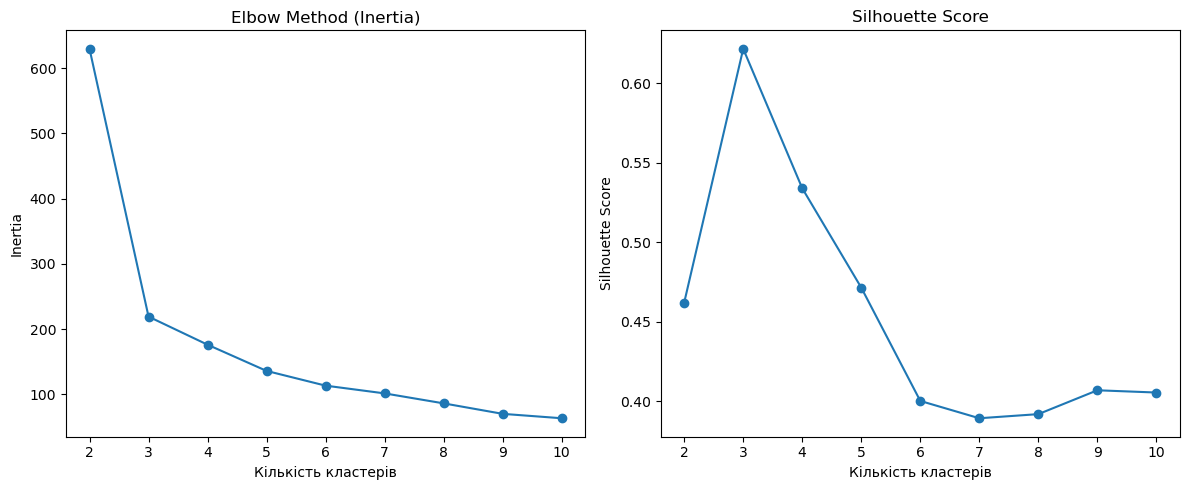

In [35]:
inertia_scores = []
silhouette_scores = []

K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette)

# побудова графіків для порівняння метрик
plt.figure(figsize=(12, 5))

# графік: сума квадратних відстаней (inertia)
plt.subplot(1, 2, 1)
plt.plot(K, inertia_scores, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')

# графік: оцінка силуету
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### 4. Обирання оптимальної кількості кластерів

За допомогою графіків із завдання 3 візуально оберіть оптимальну кількість кластерів для розбиття.

In [36]:
clusters = 3

### 5. Побудова моделей кластеризації

Навчіть моделі [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [агломеративної кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) та [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) для обраної кількості кластерів.

In [37]:
kmeans_model = KMeans(n_clusters=clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(data_scaled)

agg_model = AgglomerativeClustering(n_clusters=clusters)
agg_labels = agg_model.fit_predict(data_scaled)

# Mean Shift
bandwidth = estimate_bandwidth(data_scaled, quantile=0.2, n_samples=len(data_scaled))
ms_model = MeanShift(bandwidth=bandwidth)
ms_labels = ms_model.fit_predict(data_scaled)

### 6. Візуалізація кластерів

Побудуйте точкові діаграми для кожної з моделей кластеризації. Додатково побудуйте ще одну діаграму на основі даних із файлу `test.csv`. Цей файл такий самий, як `data.csv`, але містить додатковий стовпець `c`, що показує справжній клас кожного прикладу.

Порівняйте візуально отримані кластери з діаграмою з `test.csv` і визначте, який метод кластеризації найкраще відтворює реальний розподіл класів.

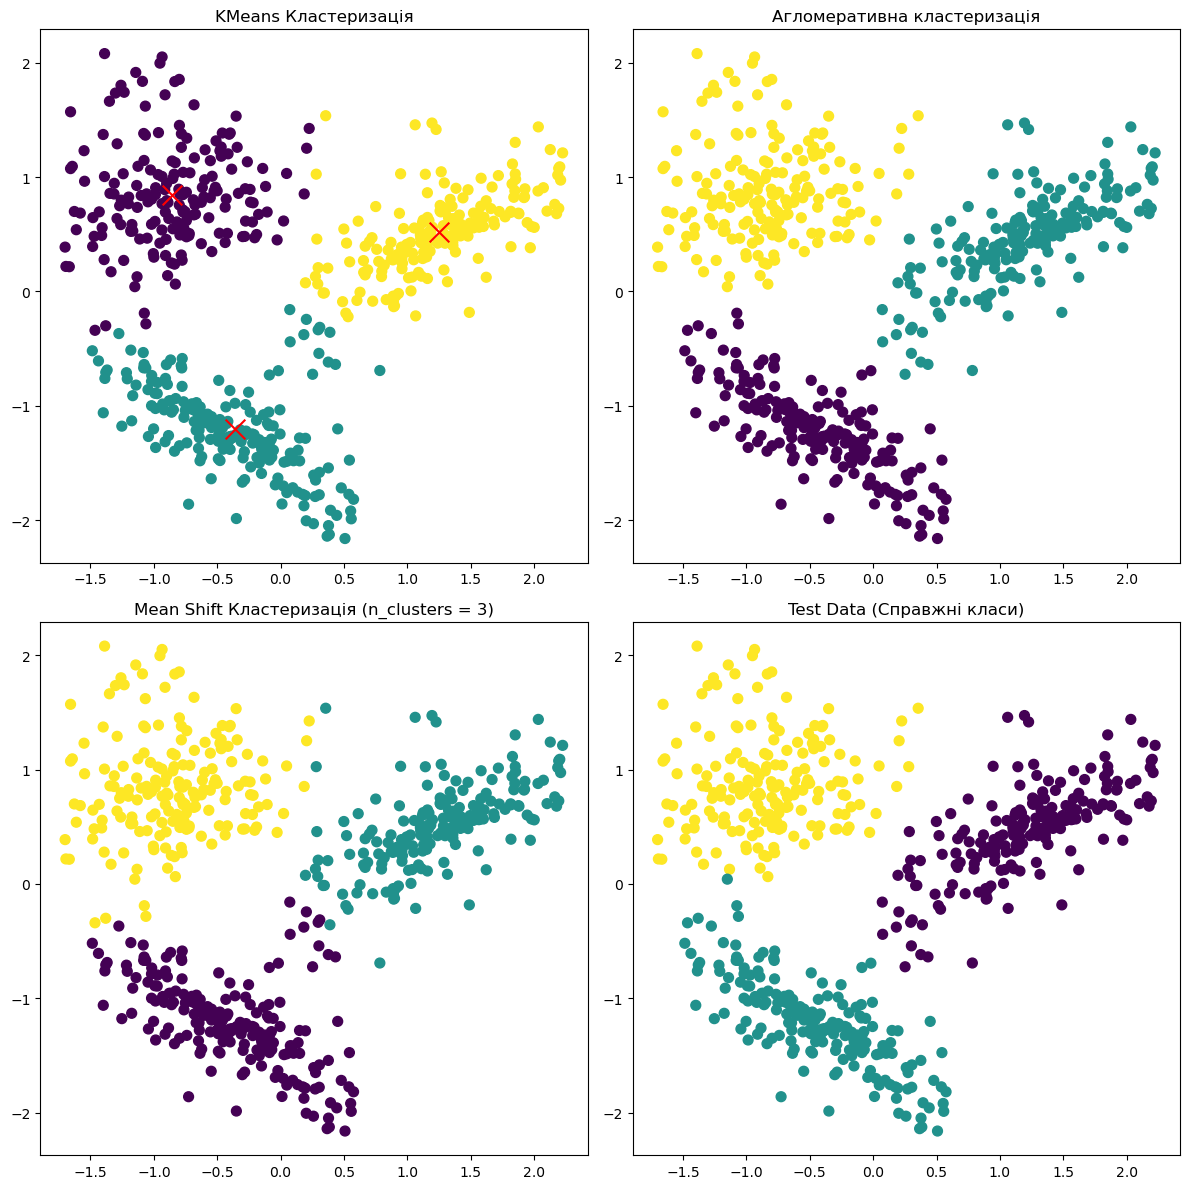

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
ax[0].scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],
              c='red', marker='x', s=200)
ax[0].set_title('KMeans Кластеризація')

ax[1].scatter(data_scaled[:, 0], data_scaled[:, 1], c=agg_labels, cmap='viridis', s=50)
ax[1].set_title('Агломеративна кластеризація')

num_ms_clusters = len(np.unique(ms_labels))
ax[2].scatter(data_scaled[:, 0], data_scaled[:, 1], c=ms_labels, cmap='viridis', s=50)
ax[2].set_title(f'Mean Shift Кластеризація (n_clusters = {num_ms_clusters})')

# тестові дані: відображення справжніх міток з файлу test.csv
# Стовпець 'c' містить реальний клас
ax[3].scatter(test_scaled[:, 0], test_scaled[:, 1], c=test['c'], cmap='viridis', s=50)
ax[3].set_title('Test Data (Справжні класи)')

plt.tight_layout()
plt.show()